#### Code to extract and plot spectra from a single NEON AOP pixel
Reza Khatami
July 10, 2018

The goal is to extract a single pixel from a hdf5 file and plot 3 figures, both without removing the bad bands of unusable data and with those bands. We also want to export a cvs of the cleaned wavelength and reflectance info for use later.

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
%matplotlib inline

In [2]:
refl_filename=('../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5')
refl_filename

'../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5'

In [3]:
pixel_to_plot=(100,100)
pixel_to_plot

(100, 100)

In [4]:
# Read in reflectance hdf5 file
hdf5_file=h5py.File(refl_filename, 'r')
hdf5_file

<HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>

In [5]:
hdf5_file.items()

ItemsViewHDF5(<HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>)

In [6]:
list(hdf5_file.items())

[('SJER', <HDF5 group "/SJER" (1 members)>)]

In [7]:
str(list(hdf5_file.items()))

'[(\'SJER\', <HDF5 group "/SJER" (1 members)>)]'

In [8]:
# get the file name
file_attrs_string=str(list(hdf5_file.items()))
file_attrs_string

'[(\'SJER\', <HDF5 group "/SJER" (1 members)>)]'

In [9]:
file_attrs_string_split=file_attrs_string.split("'")
file_attrs_string_split

['[(', 'SJER', ', <HDF5 group "/SJER" (1 members)>)]']

In [10]:
sitename=file_attrs_string_split[1]
sitename

'SJER'

In [11]:
# Extract the reflectance
refl =hdf5_file[sitename]['Reflectance']
refl

<HDF5 group "/SJER/Reflectance" (2 members)>

In [12]:
list(refl.attrs)

['Description',
 'Sensor',
 'PayloadID',
 'Scripts',
 'Acquisition_Time',
 'Band_Window_1_Nanometers',
 'Band_Window_2_Nanometers']

In [13]:
# Get the reflectance data
refldata=refl['Reflectance_Data']
refldata

<HDF5 dataset "Reflectance_Data": shape (216, 699, 426), type "<i2">

In [14]:
# Get the raw data
reflraw=refl['Reflectance_Data'].value
reflraw

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -99

In [15]:
# Create dictionary containg relevant metadata information 
# make empty dictionary first
metadata={}
metadata

{}

In [16]:
type(metadata)

dict

In [17]:
# store the map_info into a key of the same name
metadata['map_info']=refl['Metadata']['Coordinate_System']['Map_Info'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'}

In [18]:
# store the wavelength info into a key of the same name
metadata['wavelength']=refl['Metadata']['Spectral_Data']['Wavelength'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
         656.941101,  661.951416,  666.

In [19]:
# Extract no data value and store into dict
metadata['data_ignore_value']=float(refldata.attrs['Data_Ignore_Value'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        

In [20]:
# Extract scale factor and store into dict
metadata['reflectance_scale_factor'] = float(refldata.attrs['Scale_Factor'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.9102

In [21]:
# Apply no data value

# convert raw reflectance into type float (was integer, see above)
reflClean = reflraw.astype(float)
reflClean

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-99

In [22]:
# capture the shape of this raw data
arr_size=reflClean.shape
arr_size

(216, 699, 426)

In [23]:
number_of_values_where_no_data=np.count_nonzero(reflClean == metadata['data_ignore_value'])
number_of_values_where_no_data

31535502

In [24]:
total_number_of_value_in_array=(arr_size[0]*arr_size[1]*arr_size[2])
total_number_of_value_in_array

64319184

In [25]:
# check for the number of missing data points
# no result here means all clean
if metadata['data_ignore_value'] in reflraw:
    # print out the percent with no data rounded to 1 decimal place
    print('% of points with no data: ',
         np.round(number_of_values_where_no_data*100/total_number_of_value_in_array,1))
    # replace the ignore values NaNs
    nodata_ind = np.where(reflClean == metadata['data_ignore_value'])
    reflClean[nodata_ind] = np.nan 

% of points with no data:  49.0


In [26]:
# Apply scale factor
reflArray = reflClean / metadata['reflectance_scale_factor']
reflArray

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [27]:
# Extract spatial extent from attributes
metadata['spatial_extent'] = refldata.attrs['Spatial_Extent_meters']
metadata['spatial_extent']

array([ 254192.,  254891., 4102667., 4102883.])

In [28]:
# Extract bad band windows
metadata['bad_band_window1'] = (refl.attrs['Band_Window_1_Nanometers'])
metadata['bad_band_window1']

array([1340, 1445])

In [29]:
# Extract bad band windows
metadata['bad_band_window2'] = (refl.attrs['Band_Window_2_Nanometers'])
metadata['bad_band_window2']

array([1790, 1955])

In [30]:
# Extract projection information
metadata['epsg']=int(refl['Metadata']['Coordinate_System']['EPSG Code'].value)
metadata['epsg']

32611

In [31]:
# Extract map information: spatial extent & resolution (pixel size)
mapInfo = refl['Metadata']['Coordinate_System']['Map_Info'].value
mapInfo

b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'

In [32]:
hdf5_file.close

<bound method File.close of <HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>>

In [33]:
# Make a new empty pandas dataframe
serc_pixel_df=pd.DataFrame()

In [34]:
# add a column of reflectance data from the cleaned reflectance array
serc_pixel_df['reflectance']=reflArray[pixel_to_plot[0],pixel_to_plot[1],:]


In [35]:
# add a second column to the data frame with the wavelength info
serc_pixel_df['wavelengths'] = metadata['wavelength']

In [36]:
# check for any weirdness
serc_pixel_df.head(5)

,reflectance,wavelengths
0,0.0233,381.375793
1,0.0326,386.385986
2,0.0337,391.396301
3,0.0359,396.406586
4,0.0347,401.416901


In [37]:
# check for tail wierdness
serc_pixel_df.tail(5)

,reflectance,wavelengths
421,0.0918,2490.703125
422,0.1010,2495.713379
423,0.0983,2500.723633
424,0.0850,2505.733887
425,0.0836,2510.744141


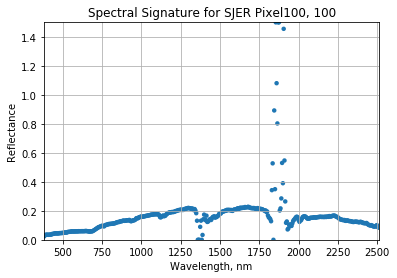

In [38]:
# make a plot
serc_pixel_df.plot(x='wavelengths',
                  y='reflectance',
                  kind='scatter',
                  edgecolor='none')
plt.title('Spectral Signature for '+sitename+' Pixel'+', '.join(map(str,pixel_to_plot)))
ax=plt.gca() # gca is short for get current axes
ax.set_xlim([np.min(serc_pixel_df['wavelengths']),
            np.max(serc_pixel_df['wavelengths'])])
ax.set_ylim([np.min(serc_pixel_df['reflectance']),
            np.max(serc_pixel_df['reflectance'])])
ax.set_xlabel('Wavelength, nm')
ax.set_ylabel('Reflectance')

ax.grid(True)
fig= ax.get_figure()
fig.savefig('output/figs/'+sitename+'_plot1.png')
             

In [39]:
bbw1 = metadata['bad_band_window1']
print('Bad Band Window 1:', bbw1)
bbw2 = metadata['bad_band_window2']
print('Bad Band Window 1:', bbw2)

Bad Band Window 1: [1340 1445]
Bad Band Window 1: [1790 1955]


C:\Users\Reza-PC\Anaconda3\envs\p35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


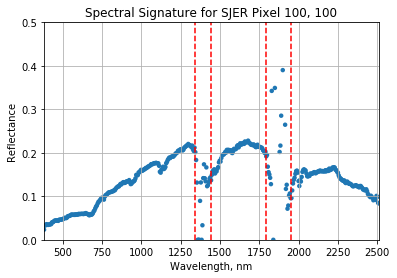

In [40]:


# make a plot with the bad regions plotted
serc_pixel_df.plot(x='wavelengths',
                   y='reflectance',
                   kind='scatter',
                   edgecolor='none')

plt.title('Spectral Signature for '+sitename+' Pixel '+', '.join(map(str, pixel_to_plot)))

ax1 = plt.gca()
ax1.grid('on')

ax1.set_xlim([np.min(serc_pixel_df['wavelengths']),
              np.max(serc_pixel_df['wavelengths'])])

ax1.set_ylim(0,0.5)

ax1.set_xlabel("Wavelength, nm")
ax1.set_ylabel("Reflectance")

# Add in red dotted lines to show boundaries of bad band windows:
ax1.plot((bbw1[0], bbw1[0]), (0,1.5), 'r--')
ax1.plot((bbw1[1], bbw1[1]), (0,1.5), 'r--')
ax1.plot((bbw2[0], bbw2[0]), (0,1.5), 'r--')
ax1.plot((bbw2[1], bbw2[1]), (0,1.5), 'r--')

fig = ax1.get_figure()
fig.savefig('output/figs/'+sitename+'_plot2.png')



In [41]:


# make a copy to deal with the mutable data type
from copy import copy
w = copy(metadata['wavelength'])

# can also use bbw1[0] or bbw1[1] to avoid hard-coding in
w[((w >= 1340) & (w <= 1445)) | ((w >= 1790) & (w <= 1955))] = np.nan 

# the last 10 bands sometimes have noise - best to eliminate
w[-10:] = np.nan

# optionally print wavelength values to show that -9999 values are replaced with nan
w



array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
        406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
        431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
        456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
        481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
        506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
        531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
        556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
        581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
        606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
        631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        656.941101,  661.951416,  666.961609,  671.971924,  676.982178,
        681.992493,  687.002808,  692.013   ,  697.023315,  702.03363 ,
        707.043884,  712.054199,  717.064392,  722.074707,  727.

In [42]:
serc_pixel_df['wavelengths'] = w
serc_pixel_df

,reflectance,wavelengths
0,0.0233,381.375793
1,0.0326,386.385986
2,0.0337,391.396301
3,0.0359,396.406586
4,0.0347,401.416901
5,0.0342,406.427185
6,0.0352,411.437408
7,0.0349,416.447693
8,0.0360,421.458008
9,0.0360,426.468292


In [43]:
serc_pixel_df.to_csv('output/csv/'+sitename+'.csv')

C:\Users\Reza-PC\Anaconda3\envs\p35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


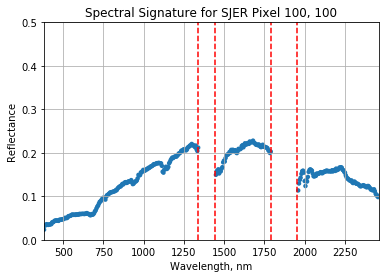

In [44]:
serc_pixel_df.plot(x='wavelengths',
                   y='reflectance',
                   kind='scatter',
                   edgecolor='none')

plt.title('Spectral Signature for '+sitename+' Pixel '+', '.join(map(str, pixel_to_plot)))

ax2 = plt.gca() # stands for 'get current axis'
ax2.grid('on')
ax2.set_xlim([np.min(serc_pixel_df['wavelengths']),
              np.max(serc_pixel_df['wavelengths'])])
ax2.set_ylim(0,0.5)
ax2.set_xlabel("Wavelength, nm")
ax2.set_ylabel("Reflectance")

#Add in red dotted lines to show boundaries of bad band windows:
ax2.plot((1340,1340), (0,1.5), 'r--')
ax2.plot((1445,1445), (0,1.5), 'r--')
ax2.plot((1790,1790), (0,1.5), 'r--')
ax2.plot((1955,1955), (0,1.5), 'r--')

fig = ax2.get_figure()
fig.savefig('output/figs/'+sitename+'_plot3.png')

In [45]:
%whos

Variable                         Type           Data/Info
---------------------------------------------------------
arr_size                         tuple          n=3
ax                               AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
ax1                              AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
ax2                              AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
bbw1                             ndarray        2: 2 elems, type `int32`, 8 bytes
bbw2                             ndarray        2: 2 elems, type `int32`, 8 bytes
copy                             function       <function copy at 0x000002A9834316A8>
fig                              Figure         Figure(432x288)
file_attrs_string                str            [('SJER', <HDF5 group "/SJER" (1 members)>)]
file_attrs_string_split          list           n=3
h5py                             module         <module 'h5py' from 'C:\\<...>ages\\h5py\\__init__.py'>
hdf5_file     

In [46]:

import IPython
print(IPython.sys_info())



{'commit_hash': '7f10f7bb3',
 'commit_source': 'installation',
 'default_encoding': '1252',
 'ipython_path': 'C:\\Users\\Reza-PC\\Anaconda3\\envs\\p35\\lib\\site-packages\\IPython',
 'ipython_version': '6.4.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.17134-SP0',
 'sys_executable': 'C:\\Users\\Reza-PC\\Anaconda3\\envs\\p35\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.5.5 |Anaconda custom (64-bit)| (default, Apr  7 2018, '
                '04:52:34) [MSC v.1900 64 bit (AMD64)]'}
